In [1]:
# Common imports
import numpy as np
import pandas as pd
import os
from scipy import stats

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [4]:
#Load CSV
football_data = pd.read_csv('fifa_players_21 - players_21.csv')   
print(football_data)

       sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         200389  https://sofifa.com/player/200389/jan-oblak/210002   
3         188545  https://sofifa.com/player/188545/robert-lewand...   
4         190871  https://sofifa.com/player/190871/neymar-da-sil...   
...          ...                                                ...   
18939     256679  https://sofifa.com/player/256679/kevin-angulo/...   
18940     257710  https://sofifa.com/player/257710/mengxuan-zhan...   
18941     250989  https://sofifa.com/player/250989/zhenghao-wang...   
18942     257697  https://sofifa.com/player/257697/zitong-chen/2...   
18943     257936   https://sofifa.com/player/257936/yue-song/210002   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés Messi Cuccittini   33   
1      

In [5]:
football_data.describe()

sofifa_id           age     height_cm     weight_kg   league_rank  \
count   18944.000000  18944.000000  18944.000000  18944.000000  18719.000000   
mean   226242.402872     25.225823    181.190773     75.016892      1.357070   
std     27171.091056      4.697354      6.825672      7.057140      0.739327   
min        41.000000     16.000000    155.000000     50.000000      1.000000   
25%    210030.500000     21.000000    176.000000     70.000000      1.000000   
50%    232314.500000     25.000000    181.000000     75.000000      1.000000   
75%    246760.250000     29.000000    186.000000     80.000000      1.000000   
max    258970.000000     53.000000    206.000000    110.000000      4.000000   

            overall     potential     value_eur       wage_eur  \
count  18944.000000  18944.000000  1.894400e+04   18944.000000   
mean      65.677787     71.086729  2.224813e+06    8675.852513   
std        7.002278      6.109985  5.102486e+06   19654.774894   
min       47.000000     47.000000  0.000000e+00       0.000000   
25%       61.000000     67.000000  3.000000e+05    1000.000000   
50%       66.000000     71.000000  6.500000e+05    3000.000000   
75%       70.000000     75.000000  1.800000e+06    7000.000000   
max       93.000000     95.000000  1.055000e+08  560000.000000   

       international_reputation  ...  mentality_penalties  \
count              18944.000000  ...         18944.000000   
mean                   1.091850  ...            48.050412   
std                    0.361841  ...            15.671721   
min                    1.000000  ...             6.000000   
25%                    1.000000  ...            38.750000   
50%                    1.000000  ...            49.000000   
75%                    1.000000  ...            60.000000   
max                    5.000000  ...            92.000000   

       mentality_composure  defending_marking  defending_standing_tackle  \
count         18944.000000                0.0               18944.000000   
mean             57.978674                NaN                  47.581767   
std              12.118390                NaN                  21.402461   
min              12.000000                NaN                   5.000000   
25%              50.000000                NaN                  27.000000   
50%              59.000000                NaN                  55.000000   
75%              66.000000                NaN                  65.000000   
max              96.000000                NaN                  93.000000   

       defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
count              18944.000000        18944.000000          18944.000000   
mean                  45.546505           16.446052             16.236486   
std                   20.953997           17.577332             16.845480   
min                    4.000000            1.000000              1.000000   
25%                   24.000000            8.000000              8.000000   
50%                   52.000000           11.000000             11.000000   
75%                   63.000000           14.000000             14.000000   
max                   90.000000           90.000000             92.000000   

       goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  
count         18944.000000             18944.000000          18944.000000  
mean             16.103357                16.225982             16.551309  
std              16.519399                17.017341             17.878121  
min               1.000000                 1.000000              1.000000  
25%               8.000000                 8.000000              8.000000  
50%              11.000000                11.000000             11.000000  
75%              14.000000                14.000000             14.000000  
max              93.000000                91.000000             90.000000  

[8 rows x 62 columns]

                                 age  attacking_crossing  attacking_finishing  \
age                         1.000000            0.127915             0.082528   
attacking_crossing          0.127915            1.000000             0.671433   
attacking_finishing         0.082528            0.671433             1.000000   
attacking_heading_accuracy  0.148629            0.483909             0.489731   
attacking_short_passing     0.147002            0.804440             0.676206   
...                              ...                 ...                  ...   
team_jersey_number         -0.221506           -0.056970            -0.015405   
value_eur                   0.084973            0.260727             0.242152   
wage_eur                    0.157284            0.247769             0.218520   
weak_foot                   0.073720            0.304718             0.369759   
weight_kg                   0.240207           -0.396089            -0.285088   

                           

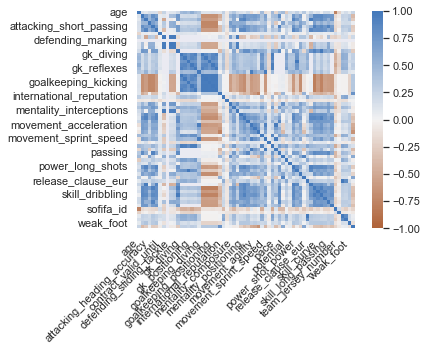

In [6]:
#to check the overview of correlations between all variables using heatmap correlation
Corr_football_data=(football_data-football_data.mean())/football_data.std()
data = Corr_football_data

correlation = data.corr()
ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(30, 250, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

print (correlation)


In [7]:
football_data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     200389  https://sofifa.com/player/200389/jan-oblak/210002   
3     188545  https://sofifa.com/player/188545/robert-lewand...   
4     190871  https://sofifa.com/player/190871/neymar-da-sil...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   27  1993-01-07   
3     R. Lewandowski                   Robert Lewandowski   31  1988-08-21   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   

   height_cm  weight_kg nationality            club_name  ...   lwb   ldm  \
0        170         72   Argentina         FC Barcelona  ...  66+3  65+3   
1        187         83    Portugal             Juventus  ...  65+3  61+3   
2        188         87    Slovenia      Atlético Madrid  ...  32+3  36+3   
3        184         80      Poland    FC Bayern München  ...  64+3  65+3   
4        175         68      Brazil  Paris Saint-Germain  ...  67+3  62+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  65+3  65+3  66+3  62+3  52+3  52+3  52+3  62+3  
1  61+3  61+3  65+3  61+3  54+3  54+3  54+3  61+3  
2  36+3  36+3  32+3  32+3  33+3  33+3  33+3  32+3  
3  65+3  65+3  64+3  61+3  60+3  60+3  60+3  61+3  
4  62+3  62+3  67+3  62+3  49+3  49+3  49+3  62+3  

[5 rows x 106 columns]

In [8]:
football_data.info

<bound method DataFrame.info of        sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         200389  https://sofifa.com/player/200389/jan-oblak/210002   
3         188545  https://sofifa.com/player/188545/robert-lewand...   
4         190871  https://sofifa.com/player/190871/neymar-da-sil...   
...          ...                                                ...   
18939     256679  https://sofifa.com/player/256679/kevin-angulo/...   
18940     257710  https://sofifa.com/player/257710/mengxuan-zhan...   
18941     250989  https://sofifa.com/player/250989/zhenghao-wang...   
18942     257697  https://sofifa.com/player/257697/zitong-chen/2...   
18943     257936   https://sofifa.com/player/257936/yue-song/210002   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés 

In [9]:
total_entries = 18944*106
(football_data.isnull().sum().sum()/total_entries)*100

10.852293552396738

In [10]:
football_data.columns.values


array(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       'league_name', 'league_rank', 'overall', 'potential', 'value_eur',
       'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves',
       'work_rate', 'body_type', 'real_face', 'release_clause_eur',
       'player_tags', 'team_position', 'team_jersey_number',
       'loaned_from', 'joined', 'contract_valid_until', 'nation_position',
       'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',


In [11]:
Del_columns = ['sofifa_id','dob','long_name','player_url','long_name',
               'body_type','real_face','nation_position','loaned_from',
               'nation_jersey_number','release_clause_eur','player_tags',
               'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf','rw', 'lam', 'cam'
               , 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb','ldm', 'cdm',
               'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

In [12]:
football_data.drop(columns=Del_columns,inplace=True)

In [13]:
#Number of columns
len(football_data.columns.values)

69

In [14]:
# I just want to analyse the top 50 players.
football_data = football_data[:50]

In [15]:
football_data.head()

short_name  age  height_cm  weight_kg nationality  \
0           L. Messi   33        170         72   Argentina   
1  Cristiano Ronaldo   35        187         83    Portugal   
2           J. Oblak   27        188         87    Slovenia   
3     R. Lewandowski   31        184         80      Poland   
4          Neymar Jr   28        175         68      Brazil   

             club_name             league_name  league_rank  overall  \
0         FC Barcelona  Spain Primera Division          1.0       93   
1             Juventus         Italian Serie A          1.0       92   
2      Atlético Madrid  Spain Primera Division          1.0       91   
3    FC Bayern München    German 1. Bundesliga          1.0       91   
4  Paris Saint-Germain          French Ligue 1          1.0       91   

   potential  ...  mentality_penalties  mentality_composure defending_marking  \
0         93  ...                   75                   96               NaN   
1         92  ...                   84                   95               NaN   
2         93  ...                   11                   68               NaN   
3         91  ...                   88                   88               NaN   
4         91  ...                   92                   93               NaN   

  defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                        35                        24                   6   
1                        32                        24                   7   
2                        12                        18                  87   
3                        42                        19                  15   
4                        30                        29                   9   

   goalkeeping_handling goalkeeping_kicking goalkeeping_positioning  \
0                    11                  15                      14   
1                    11                  15                      14   
2                    92                  78                      90   
3                     6                  12                       8   
4                     9                  15                      15   

   goalkeeping_reflexes  
0                     8  
1                    11  
2                    90  
3                    10  
4                    11  

[5 rows x 69 columns]

In [16]:
football_data.tail()

short_name  age  height_cm  weight_kg     nationality  \
45     A. Griezmann   29        176         73          France   
46           H. Son   27        183         78  Korea Republic   
47  Roberto Firmino   28        181         76          Brazil   
48        R. Varane   27        191         81          France   
49         P. Pogba   27        191         84          France   

            club_name             league_name  league_rank  overall  \
45       FC Barcelona  Spain Primera Division          1.0       87   
46  Tottenham Hotspur  English Premier League          1.0       87   
47          Liverpool  English Premier League          1.0       87   
48        Real Madrid  Spain Primera Division          1.0       86   
49  Manchester United  English Premier League          1.0       86   

    potential  ...  mentality_penalties  mentality_composure  \
45         87  ...                   86                   89   
46         87  ...                   73                   88   
47         87  ...                   72                   88   
48         88  ...                   43                   83   
49         87  ...                   83                   87   

   defending_marking defending_standing_tackle  defending_sliding_tackle  \
45               NaN                        54                        49   
46               NaN                        34                        33   
47               NaN                        64                        42   
48               NaN                        87                        86   
49               NaN                        67                        65   

    goalkeeping_diving  goalkeeping_handling goalkeeping_kicking  \
45                  14                     8                  14   
46                  11                    13                  13   
47                   8                    11                   9   
48                  11                    11                   9   
49                   5                     6                   2   

   goalkeeping_positioning  goalkeeping_reflexes  
45                      13                    14  
46                       6                    10  
47                       6                    10  
48                       5                    14  
49                       4                     3  

[5 rows x 69 columns]

In [17]:
missing_data = football_data.isnull().sum()
print(missing_data[missing_data > 0])

pace                 10
shooting             10
passing              10
dribbling            10
defending            10
physic               10
gk_diving            40
gk_handling          40
gk_kicking           40
gk_reflexes          40
gk_speed             40
gk_positioning       40
player_traits         1
defending_marking    50
dtype: int64


In [19]:
# Let's start by replacing [pace,shooting,passing,dribbling,defending]

# They are all missing exaclty 15 values. 

# I suspect they are all goalkeepers (GK). let's make sure though. 

football_data[football_data['pace'].isnull()]['team_position']

2     GK
7     GK
9     GK
12    GK
16    GK
18    GK
23    GK
36    GK
40    GK
44    GK
Name: team_position, dtype: object

Looks like my suspicions were right, they're all goalies.

I thought about replacing these values with 0 but that wouldn't do our goalkeepers justice, after all, goalkeepers can run, shoot, and give good passes, so a value of 0 is not fair.

I decided to replace the missing values with the minimum value available for the corresponding column.

In [22]:
# Let's create a list and replace the missing values in one go


missing_values_list = ['pace','shooting','passing','dribbling','defending']
for x in missing_values_list:
        football_data[x].fillna(football_data[x].min(), inplace=True)

For the "phisic" column, I didn't want to use the min value because some goalkeepers have a better physique than many outfield players.

In [23]:
football_data['physic'].fillna(football_data['physic'].mean(), inplace=True)

In [24]:
                            ##player_traits'##
# 5 players are missing "player_traits" I will replace the missing values with 'No traits available'

football_data['player_traits'] = football_data['player_traits'].fillna('No traits available')

                            ## defending_marking ##
# defending_marking is missing for all 100 players so I will just delete it 

football_data.drop(columns='defending_marking',inplace=True)

In [25]:
#Let us see what are we left with
missing_data = football_data.isnull().sum()
print(missing_data[missing_data > 0])

gk_diving         40
gk_handling       40
gk_kicking        40
gk_reflexes       40
gk_speed          40
gk_positioning    40
dtype: int64


As you can see, outfield players are not given any goalkeeper's rating. We will replace the missing values with a very small value .

In [26]:
football_data.fillna(10,inplace=True)

In [27]:
football_data.isnull().sum().sum() # no missing values left


0

# Analysis

# 1. Analysis on Age of the top 50 players

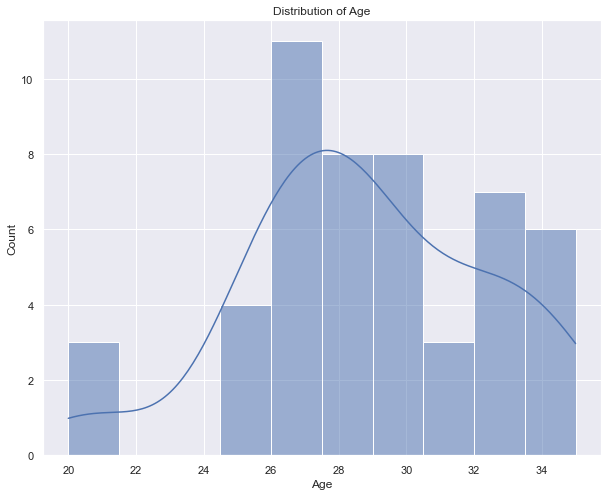

In [28]:
plt.figure(figsize=(10,8))

ax = sns.histplot(data=football_data,x='age',kde=True,bins=10, color='b')

ax.set(xlabel='Age',ylabel='Count',title='Distribution of Age',)

plt.show()

# 2. Country

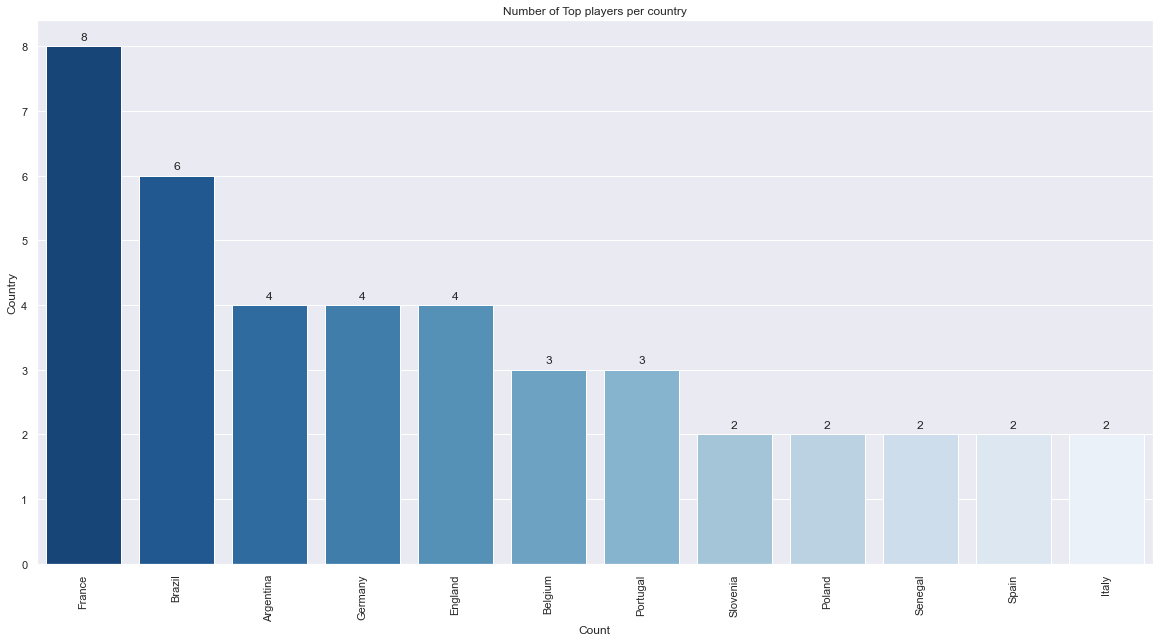

In [35]:
fig, ax1 = plt.subplots(figsize=(20,10))

graph = sns.countplot(ax=ax1, data=football_data, x='nationality', order=football_data['nationality'].value_counts().head(12).index, palette='Blues_r' )

ax1.set(xlabel='Count',ylabel='Country',title='Number of Top players per country',)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2.,height +0.1,height, ha="center")
    
plt.show()


France and Brazil alone account for xx% of the top 50 players.



# 3. Position


Before we begin analysing positions let's change something. Instead of having multiple positions, I want to narrow them down to goalie, defender, midfielder and attacker. I will then create a new column called 'position' to reflect these changes.

In [36]:
#this is what we initialy had for positions 
football_data['player_positions']

0      RW, ST, CF
1          ST, LW
2              GK
3              ST
4         LW, CAM
5         CAM, CM
6      ST, LW, RW
7              GK
8              CB
9              GK
10             LW
11             RW
12             GK
13             ST
14             CB
15         CF, ST
16             GK
17            CDM
18             GK
19         LW, RW
20        CDM, RB
21             ST
22        CF, CAM
23             GK
24             CM
25         LW, ST
26             CB
27        CDM, CM
28    RM, LM, CAM
29             RB
30        CAM, CM
31             CB
32            CDM
33             LB
34    RW, CAM, CM
35             CB
36             GK
37             ST
38             CM
39         RW, LW
40             GK
41         ST, LW
42            CDM
43             ST
44             GK
45     ST, CF, LW
46         LM, CF
47             CF
48             CB
49        CM, CDM
Name: player_positions, dtype: object

In [38]:
# how I changed it:

positions_list=[]

[positions_list.append(x.split(',')[0]) for x in football_data['player_positions'].values.tolist()]
    
football_data['position']= positions_list


for x in football_data['position']:
    if x in ['ST','CF','RW','LW']:
        football_data['position'].replace(to_replace=x,value='Attacker',inplace=True) 
    if x in ['LM','RM','CM','CDM','CAM']:
        football_data['position'].replace(to_replace=x,value='Midfielder',inplace=True)
    if x in ['LB','RB','CB']:
        football_data['position'].replace(to_replace=x,value='Defender',inplace=True)
    if x in ['GK']:
        football_data['position'].replace(to_replace=x,value='Goalie',inplace=True)


In [39]:
# This is how it looks like now
football_data['position']


0       Attacker
1       Attacker
2         Goalie
3       Attacker
4       Attacker
5     Midfielder
6       Attacker
7         Goalie
8       Defender
9         Goalie
10      Attacker
11      Attacker
12        Goalie
13      Attacker
14      Defender
15      Attacker
16        Goalie
17    Midfielder
18        Goalie
19      Attacker
20    Midfielder
21      Attacker
22      Attacker
23        Goalie
24    Midfielder
25      Attacker
26      Defender
27    Midfielder
28    Midfielder
29      Defender
30    Midfielder
31      Defender
32    Midfielder
33      Defender
34      Attacker
35      Defender
36        Goalie
37      Attacker
38    Midfielder
39      Attacker
40        Goalie
41      Attacker
42    Midfielder
43      Attacker
44        Goalie
45      Attacker
46    Midfielder
47      Attacker
48      Defender
49    Midfielder
Name: position, dtype: object

In [41]:
#We no longer need df['player_positions'], I'll just go ahead and delete it.
football_data.drop(columns='player_positions', inplace=True)

How many players do we have in each of the 4 positions ?



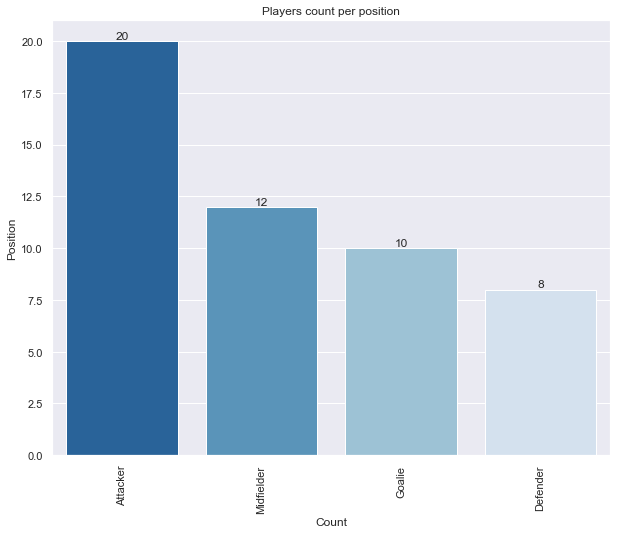

In [42]:
fig, ax1 = plt.subplots(figsize=(10,8))

graph = sns.countplot(ax=ax1, data=football_data, x='position', order=football_data['position'].value_counts().head(10).index, palette='Blues_r' )

ax1.set(xlabel='Count',ylabel='Position',title='Players count per position',)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2.,height +0.1,height, ha="center")
    
plt.show()


Does the position of a player determine his value?

Note: This plot is interactive



In [43]:
fig = px.scatter(football_data,x='short_name',y='value_eur',color='position',
                 labels={'value_eur': 'Value in Euro','position':'Position'})
fig.update_xaxes(visible=False)
# allign title
fig.update_layout(title_text='Value in Euro per Position', title_x=0.5)

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,)),
                  selector=dict(mode='markers'))

fig.show()

The most valuable player on FIFA21 is Mbappé with a price tag of 105M Euros. Not surprising considering he was a world cup champion at 19 years old. What surprises me is that Lionel Messi is only 67M euros. Apart from that, it looks like Attackers are the most valuable of the 4 positions.

# 4. Goalkeepers analysis

For this analysis, I really want to focus on analyzing goalkeepers’ traits. So I created a new DataFrame just for GK.

In [44]:
football_data_goalie = football_data[football_data['position']=='Goalie']

football_data_goalie =football_data_goalie[['short_name', 'age', 'height_cm', 'weight_kg','overall','nationality','gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning','goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes',]]

In [45]:
football_data_goalie.columns

Index(['short_name', 'age', 'height_cm', 'weight_kg', 'overall', 'nationality',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'goalkeeping_diving', 'goalkeeping_handling',
       'goalkeeping_kicking', 'goalkeeping_positioning',
       'goalkeeping_reflexes'],
      dtype='object')

One of the reasons I created a new DF for goalies was to create a pairplot. With a pairplot I would be able to see a quick preview of all relationships between the 15 columns. It helps me see correlations I would have probably missed. I understand that pairplot should not be used as a visual but a quick analysis tool to understand your data better.

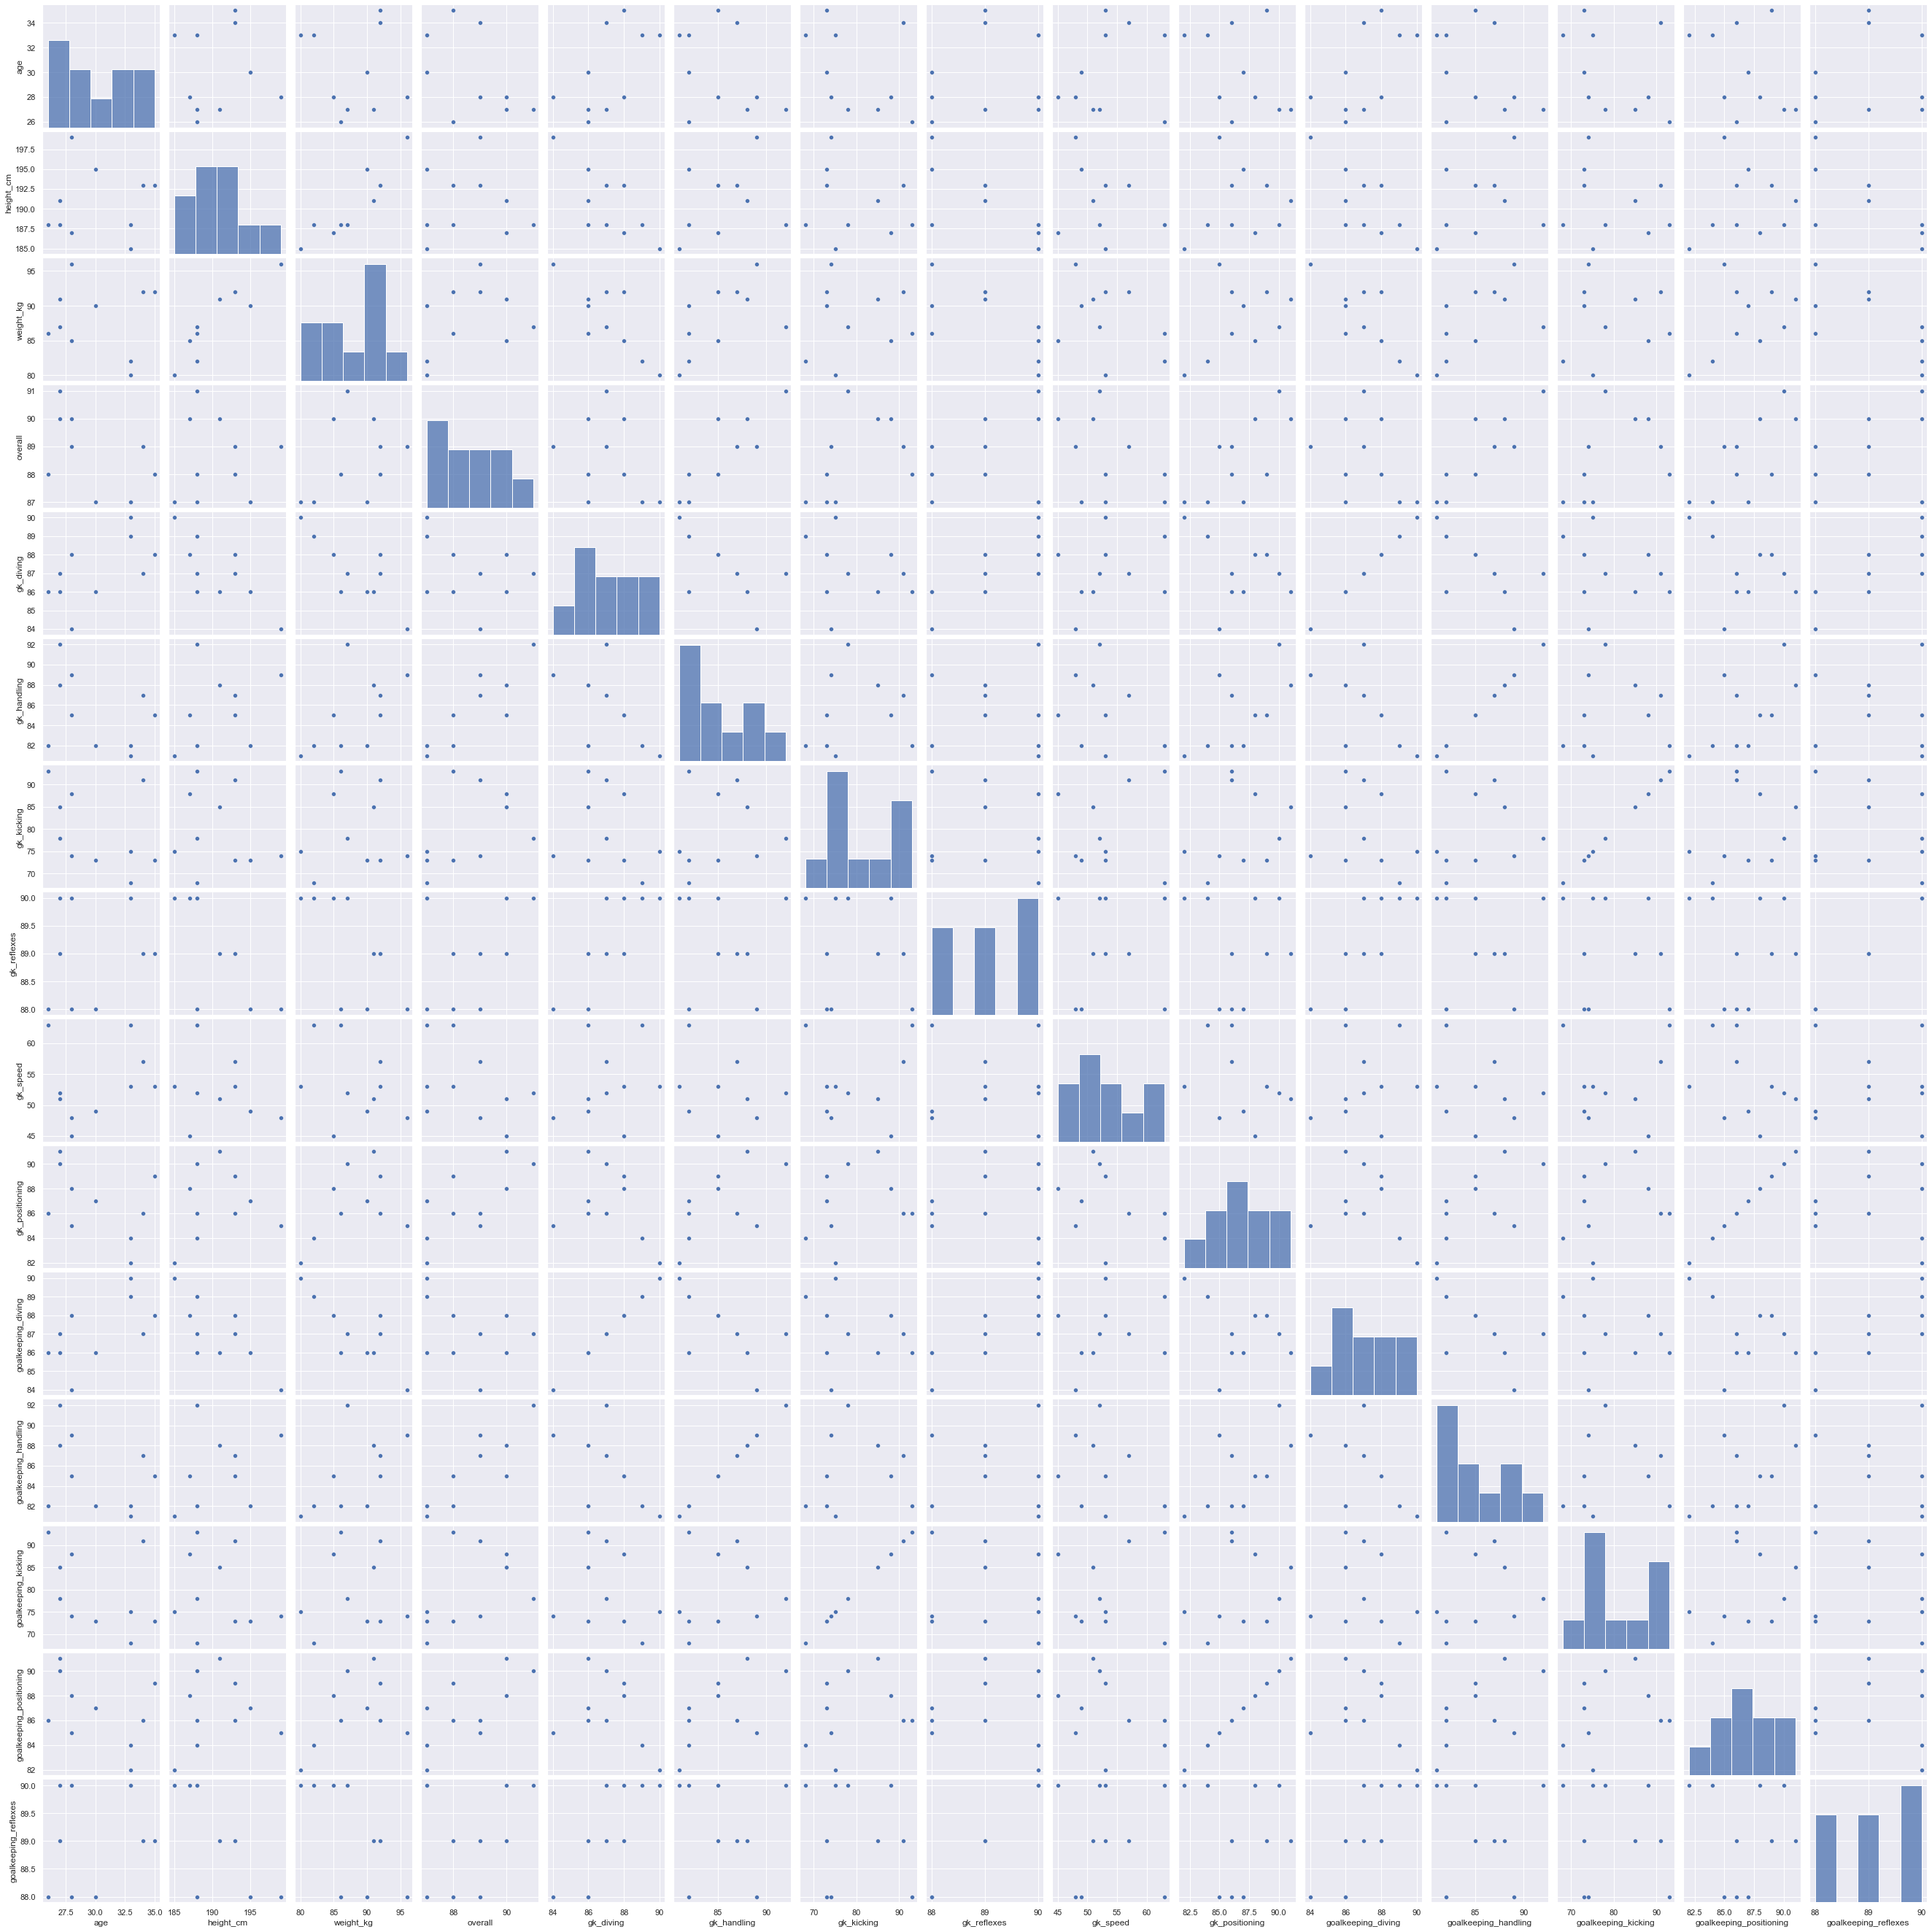

In [46]:
sns.pairplot(data=football_data_goalie)

Okay, I see that some of the columns are perfectly correlated, this just tells that they are redundant columns. I missed it at first but the pairplot helped catch it. I will go ahead and remove them.

In [47]:
football_data_goalie =football_data_goalie[['short_name', 'age', 'height_cm', 'weight_kg','overall','nationality','gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning',]]

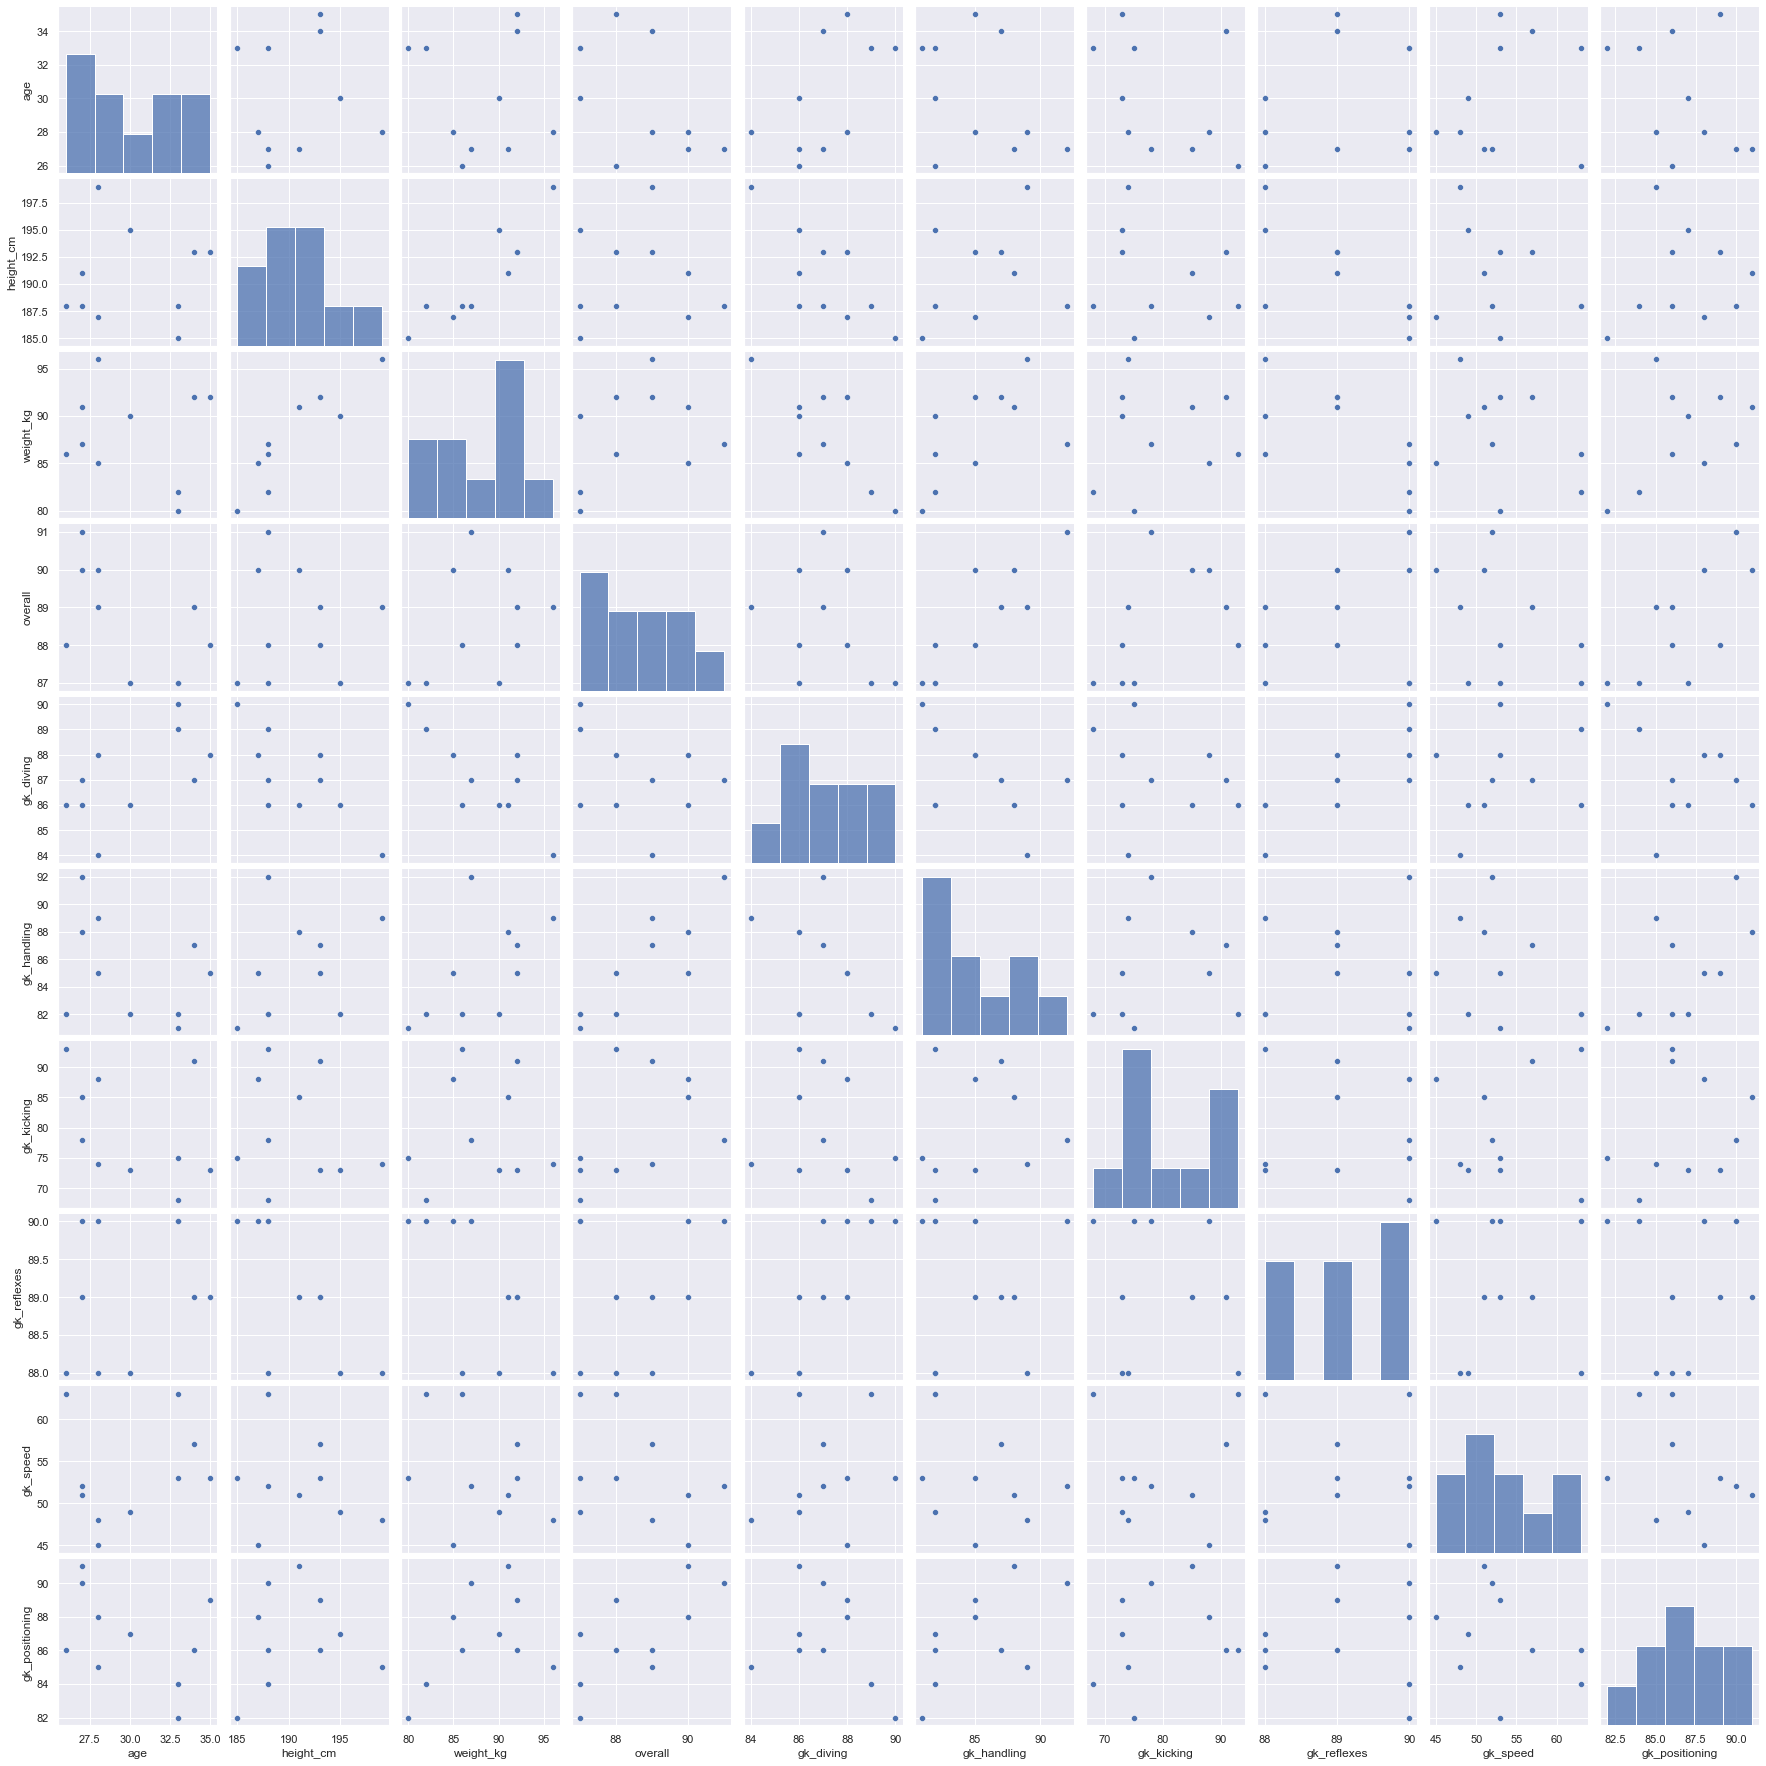

In [48]:
sns.pairplot(data=football_data_goalie)

Upon analyzing the pairplot, there seem to be high correlation between the overall rating and the positioning, this simply means that if you want to be a good goalkeeper then positioning should be your number 1 priority.

In [54]:
fig = px.scatter(data_frame=football_data_goalie,x='gk_positioning',y='overall', 
                 color='short_name',
                 color_discrete_sequence=["#4884AF"],
                 labels={'gk_positioning': 'Positioning','overall':'Overall Rating','short_name':'Player Name'})


fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,)),
                  selector=dict(mode='markers'))

fig.update_layout(title_text='GK Overall Rating vs Positioning', title_x=0.5,
                  showlegend=False,
                  hoverlabel=dict(bgcolor="white",font_size=16,font_family="Rockwell")
    
)

fig.show()

# 5. More Viz

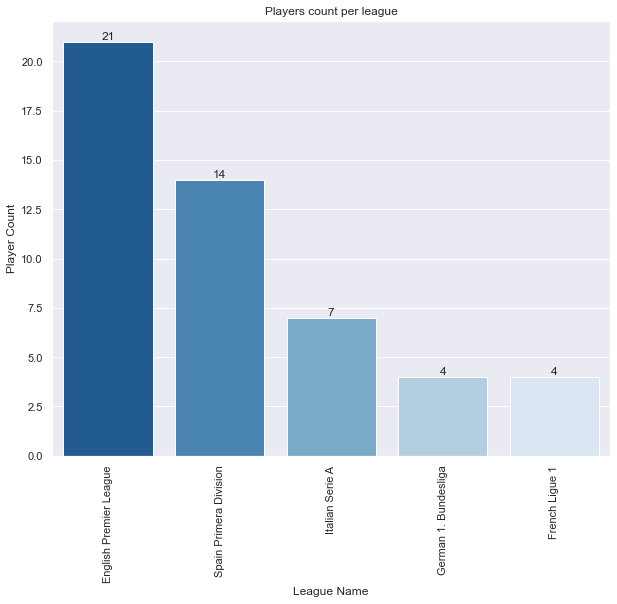

In [50]:
fig, ax1 = plt.subplots(figsize=(10,8))

graph = sns.countplot(ax=ax1, data=football_data, x='league_name', order=football_data['league_name'].value_counts().index, palette='Blues_r' )

ax1.set(xlabel='League Name',ylabel='Player Count',title='Players count per league',)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2.,height +0.1,height, ha="center")
    
plt.show()

It should come as no surprise that all 100 players are in the top 5 leagues in Europe.



In [53]:
fig = px.histogram(data_frame=football_data, x='club_name',labels={'club_name':'Club Name'},
                  width=900, height=600,template="simple_white",color='short_name', color_discrete_sequence=["#508CB4"])

fig.update_xaxes(categoryorder='total descending', )

fig.update_layout(showlegend=False, title_text='Players Count per Club ', title_x=0.5,
                 hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    ))

In [52]:
fig = px.scatter(data_frame=football_data[football_data['pace']>42], x='short_name',y='pace',color='position', labels={'pace':'Pace','position':'Position'} )
fig.update_xaxes(visible=False)
# allign title
fig.update_layout(title_text='Pace vs Position', title_x=0.5)

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,)),
                  selector=dict(mode='markers'))

fig.show()


In [ ]:
It looks like attackers are fast compared to all the other positions.

